In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from IPython.display import display
import re
%matplotlib inline
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
from datetime import datetime

In [2]:
! pip install jieba wordcloud snownlp

In [3]:
import jieba
from wordcloud import WordCloud

# Load stopwords
with open('../analysis/cn_stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords = set([line.strip() for line in file])

In [4]:
# read movie list
df_books = pd.read_csv('../analysis/BookDouban250.csv')

In [5]:
df_books = df_books.drop(df_books.columns[0], axis=1)
display(df_books)

,书名,豆瓣链接,作者,译者,出版社,出版日期,价格,评分,评分人数,一句话评价
0,红楼梦,https://book.douban.com/subject/1007305/,[清] 曹雪芹 著,NaN,人民文学出版社,1996-12,59.70元,9.6,413446,都云作者痴，谁解其中味？
1,活着,https://book.douban.com/subject/4913064/,余华,NaN,作家出版社,2012-8-1,20.00元,9.4,805477,生的苦难与伟大
2,1984,https://book.douban.com/subject/4820710/,[英] 乔治·奥威尔,刘绍铭,北京十月文艺出版社,2010-4-1,28.00,9.4,275446,栗树荫下，我出卖你，你出卖我
3,三体全集,https://book.douban.com/subject/6518605/,刘慈欣,NaN,重庆出版社,2012-1,168.00元,9.5,177655,地球往事三部曲
4,哈利·波特,https://book.douban.com/subject/24531956/,J.K.罗琳 (J.K.Rowling),苏农,人民文学出版社,2008-12-1,498.00元,9.7,99161,从9¾站台开始的旅程
...,...,...,...,...,...,...,...,...,...,...
245,青铜时代,https://book.douban.com/subject/1085883/,王小波,NaN,花城出版社,1997-5,29.00元,8.8,26740,唐人传奇贯注现代情趣
246,中国哲学简史,https://book.douban.com/subject/1021273/,冯友兰,赵复三,新世界出版社,2004-1,38.00元,8.9,19920,中国哲学入门书
247,坟,https://book.douban.com/subject/1974029/,鲁迅,NaN,人民文学出版社,2006-12,16.00元,9.6,11413,NaN
248,如父如子,https://book.douban.com/subject/27611824/,[日] 是枝裕和,丹勇,湖南文艺出版社,2018-4,49.80,8.9,26290,NaN


In [6]:
df_books['书名'].unique()

array(['红楼梦', '活着', '1984', '三体全集', '哈利·波特', '百年孤独', '飘', '房思琪的初恋乐园',
       '动物农场', '三国演义（全二册）', '福尔摩斯探案全集（上中下）', '白夜行', '小王子', '撒哈拉的故事',
       '安徒生童话故事集', '天龙八部', '呐喊', '悉达多', '杀死一只知更鸟', '邓小平时代', '明朝那些事儿（1-9）',
       '失踪的孩子', '新名字的故事', '沉默的大多数', '野草', '中国历代政治得失', '局外人', '人类简史',
       '白鹿原', '平凡的世界（全三部）', '乡土中国', '围城', '笑傲江湖（全四册）', '罗杰疑案', '彷徨',
       '我与地坛', '东方快车谋杀案', '肖申克的救赎', '献给阿尔吉侬的花束', '许三观卖血记', '基督山伯爵', '江城',
       '霍乱时期的爱情', '卡拉马佐夫兄弟', '城南旧事', '故事新编', '万历十五年', '月亮和六便士', '艺术的故事',
       '朝花夕拾', '射雕英雄传', '追风筝的人', '厌女', '置身事内', '寻路中国', '刀锋', '树上的男爵',
       '秋园', '格林童话全集', '中国少年儿童百科全书（全四册）', '无人生还', '嫌疑人X的献身', '鼠疫',
       '史记（全十册）', '黄金时代', '傲慢与偏见', '西游记（全二册）', '始于极限', '悲惨世界（上中下）', '诗经',
       '台北人', '永恒的终结', '神雕侠侣', '上帝掷骰子吗', '孽子', '历史深处的忧虑', '可能性的艺术',
       '刘擎西方现代思想讲义', '一个叫欧维的男人决定去死', '唐诗三百首', '哭泣的骆驼', '美丽新世界', '文学回忆录',
       '灿烂千阳', '最好的告别', '美的历程', '四世同堂', '窗边的小豆豆', '人间词话', '道德经', '呼兰河传',
       '冬牧场', '看见', '绝叫', '浪潮之巅', '罪与罚', '棋王·树王·孩子王', '离开的，留下的',
       '也许你

In [7]:
book_name = '呐喊'

book_file_path = "data/" + book_name + ".csv"

df_book = pd.read_csv(book_file_path)
df_book

,user_name,star,comment_time,geo_ip,vote,short
0,年高,4.0,2013-01-19 23:45:58,unknown,2876,鲁迅如果不被赋予那么多政治色彩，单看作品也是一个优秀的毒舌家的
1,老黄天生神力,5.0,2012-06-03 01:15:41,unknown,2545,看他的文章还无法醒悟的人是该有多么可悲
2,娅,5.0,2011-07-18 21:54:43,unknown,1666,一个特立独行的人需要金钱来保持他的尊严，否则就只有被毁灭的份，人们是不能容忍一个穷光蛋的异类...
3,愚公,5.0,2015-05-14 17:20:21,unknown,981,这部小说，大体上是描写了辛亥革命前后乡村发生的一系列的故事，其中以鞭子、革命、秀才、假洋鬼子...
4,PulpOrange,5.0,2015-08-24 06:15:11,unknown,790,狂人在望着赵家的狗，孔乙己在讲茴字的四种写法，华老栓在拿夏瑜的血馒头，九斤老太在感叹一代不如...
...,...,...,...,...,...,...
215,vagueness,5.0,2013-06-10 01:07:56,unknown,0,天下确无新鲜事喽。可是读它的感受却是常读常新。
216,高原,5.0,2009-01-23 15:44:25,unknown,0,成长记忆
217,小叶榄仁,5.0,2010-02-16 18:05:53,unknown,0,不读鲁迅不成人
218,無 字,NaN,2009-07-14 09:55:36,unknown,0,鲁迅不是浅薄之人可以解读的了的。


### Stars

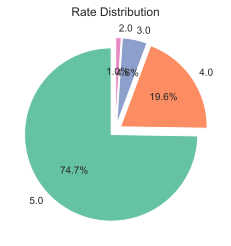

In [8]:
counts = df_book['star'].value_counts()

plt.figure(figsize=(8,4))
explode = [0.07] * len(counts)
plt.title("Rate Distribution")
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
                                   startangle=90, colors=sns.color_palette('Set2'), explode=explode)
plt.show()

### Relationship between stars and votes

In [9]:
# handle missing data

if df_book['star'].hasnans:
    # Calculate the mean of the 'star' column, excluding NaNs
    mean_star = df_book['star'].mean()

    # Fill NaN values in the 'star' column with the mean
    df_book['star'] = df_book['star'].fillna(mean_star)

              vote        star
count   220.000000  220.000000
mean     49.136364    4.680412
std     292.967325    0.574121
min       0.000000    2.000000
25%       0.000000    4.680412
50%       1.000000    5.000000
75%       2.000000    5.000000
max    2876.000000    5.000000


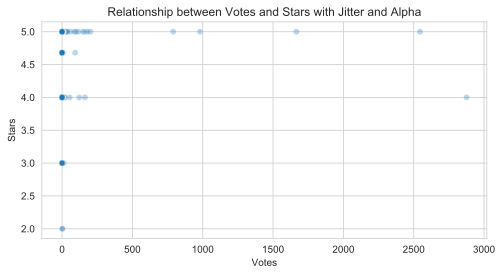

In [10]:
# Statistical Summary
print(df_book[['vote', 'star']].describe())

# Jittered Scatter Plot with Alpha
plt.figure(figsize=(8, 4))
sns.scatterplot(x='vote', y='star', data=df_book, alpha=0.3, x_jitter=True)
plt.title('Relationship between Votes and Stars with Jitter and Alpha')
plt.xlabel('Votes')
plt.ylabel('Stars')
plt.show()


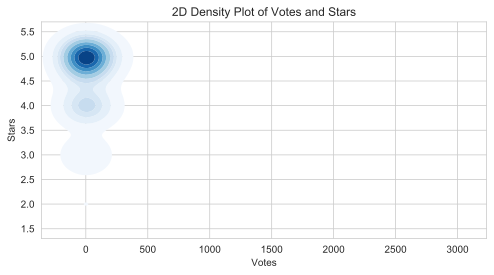

In [11]:
# 2D Density Plot
plt.figure(figsize=(8, 4))
sns.kdeplot(x='vote', y='star', data=df_book, cmap='Blues', shade=True, thresh=0.05)
plt.title('2D Density Plot of Votes and Stars')
plt.xlabel('Votes')
plt.ylabel('Stars')
plt.show()

In [12]:
# Convert 'comment_time' to datetime if it's not already
df_book['comment_time'] = pd.to_datetime(df_book['comment_time'])

# Extract year from 'comment_time'
df_book['year'] = df_book['comment_time'].dt.year

# Group by the extracted year and calculate mean star value
yearly_mean_star = df_book.groupby('year')['star'].mean()

# Display the result
print(yearly_mean_star)

year
2006    4.736082
2007    4.560137
2008    4.651203
2009    4.571862
2010    4.730431
2011    4.702097
2012    4.428981
2013    4.609460
2014    4.750000
2015    4.750000
2016    5.000000
2017    4.400000
2018    4.607310
2019    4.363636
2020    4.834583
2021    5.000000
Name: star, dtype: float64


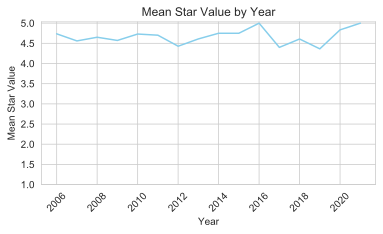

In [13]:
# Plotting
plt.figure(figsize=(6, 3))
yearly_mean_star.plot(kind='line', color='skyblue')
plt.title('Mean Star Value by Year')
plt.xlabel('Year')
plt.ylabel('Mean Star Value')
plt.yticks([0.5*i for i in range(2,11)])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/dd/hnkwsmd116g2rdm23dm3rhlc0000gn/T/jieba.cache
Loading model cost 0.313 seconds.
Prefix dict has been built successfully.


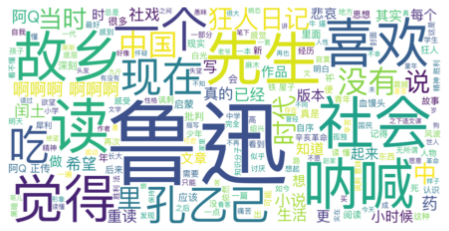

In [14]:
# Join all comments into a single string
text = ' '.join(df_book['short'])

# Segment text with jieba
seg_list = jieba.cut(text, cut_all=False)
segmented_text = ' '.join(seg for seg in seg_list if seg not in stopwords)

# Generate word cloud
wordcloud = WordCloud(font_path='/System/Library/fonts/PingFang.ttc',  # Specify the path to a Chinese font
                      width=1600, height=800,
                      background_color='white').generate(segmented_text)

# Display the word cloud
plt.figure(figsize=(12, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Generate SVG format
svg_image = wordcloud.to_svg()

# Save SVG to a file
with open(book_name + '_wordcloud.svg', 'w', encoding='utf-8') as file:
    file.write(svg_image)

### Sentiment analysis

In [15]:
from snownlp import SnowNLP

# Apply to all comments in df_book
# SnowNLP's sentiment returns a float between 0 (negative) and 1 (positive)
df_book['sentiment'] = df_book['short'].apply(lambda x: SnowNLP(x).sentiments)

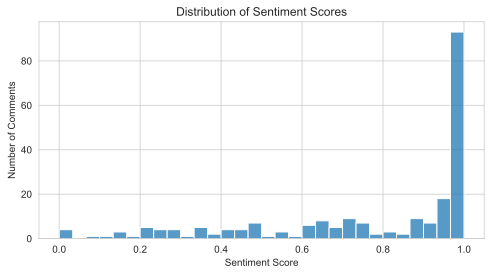

In [16]:
# Histogram of Sentiment Scores
plt.figure(figsize=(8, 4))
sns.histplot(df_book['sentiment'], bins=30, kde=False)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')
plt.show()

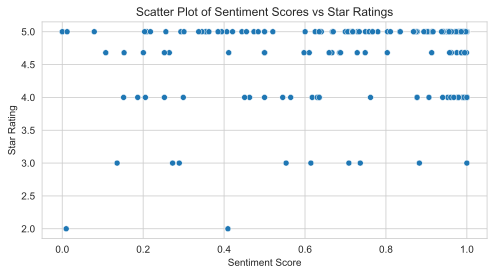

In [17]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='sentiment', y='star', data=df_book)
plt.title('Scatter Plot of Sentiment Scores vs Star Ratings')
plt.xlabel('Sentiment Score')
plt.ylabel('Star Rating')
plt.show()

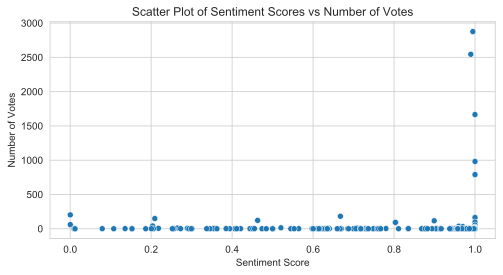

In [18]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='sentiment', y='vote', data=df_book)
plt.title('Scatter Plot of Sentiment Scores vs Number of Votes')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Votes')
plt.show()

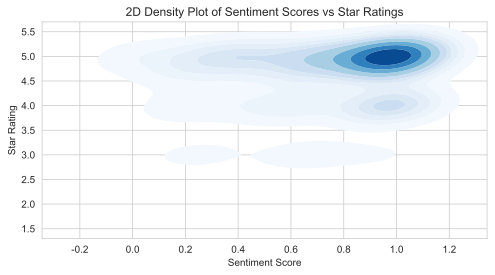

In [19]:
# 2D Density plot of sentiment scores vs star ratings
plt.figure(figsize=(8, 4))
sns.kdeplot(x=df_book['sentiment'], y=df_book['star'], cmap="Blues", shade=True, thresh=0.05)
plt.title('2D Density Plot of Sentiment Scores vs Star Ratings')
plt.xlabel('Sentiment Score')
plt.ylabel('Star Rating')
plt.show()

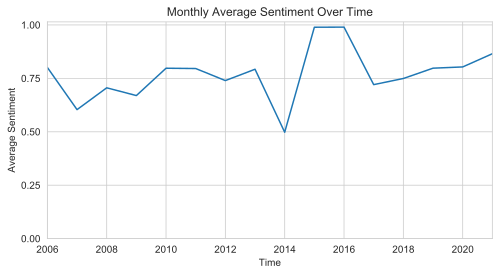

In [20]:
# Sort the DataFrame by 'comment_time'
df_book.sort_values('comment_time', inplace=True)

# Resample the data to get monthly/yearly averages of sentiment
# monthly_sentiment = df_book.resample('M', on='comment_time')['sentiment'].mean()
monthly_sentiment = df_book.resample('Y', on='comment_time')['sentiment'].mean()

# Plotting the time series
plt.figure(figsize=(8, 4))
monthly_sentiment.plot()
plt.title('Monthly Average Sentiment Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.show()